In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display
from pypalettes import load_cmap

import warnings
warnings.filterwarnings('ignore')

In [2]:
cleaned_df = pd.read_csv('deoxyfluorination_cleaned.csv')
enhanced_df = pd.read_csv('deoxyfluorination_enhanced.csv')

In [3]:
def plot_histogram_with_statistics_subplots(data, title, ax, threshold=None, log_scale=True, x_title = 'yield'):

    cmap = load_cmap('Austria')

    ax.hist(data, bins=30, alpha=0.75, edgecolor='black', log=log_scale, color=cmap(1))

    # Calculate statistics
    mean = data.mean()
    median = data.median()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    min_val = data.min()
    max_val = data.max()
    std = data.std()

    # Add vertical lines for statistics
    ax.axvline(mean, color=cmap(0), linestyle='dashed', label='Mean')
    #ax.axvline(median, color='g', linestyle='dashed', linewidth=2, label='Median')
    #ax.axvline(q1, color='purple', linestyle='dashed', linewidth=2, label='Q1')
    #ax.axvline(q3, color='purple', linestyle='dashed', linewidth=2, label='Q3')
    #ax.axvline(min_val, color='blue', linestyle='dashed', linewidth=2, label='Min')
    ax.axvline(max_val, color=cmap(4), linestyle='dashed', label='Max')

    ylim = ax.get_ylim()
    if log_scale:
        y_positions = np.logspace(np.log10(ylim[0] * 1.1), np.log10(ylim[1] * 0.9), 6)
    else:
        y_positions = np.linspace(ylim[0] * 1.1, ylim[1] * 0.9, 6)
    
    # Add text for statistics
    ax.text(mean, (y_positions[4] + y_positions[5] * 3)/4, f'Mean: {mean:.3f}', color=cmap(0), fontsize=10, ha='left')
    #ax.text(median, y_positions[1], f'Median: {median:.4f}', color='g', fontsize=8, ha='center')
    #ax.text(q1, y_positions[2], f'Q1: {q1:.4f}', color='purple', fontsize=8, ha='center')
    #ax.text(q3, y_positions[3], f'Q3: {q3:.4f}', color='purple', fontsize=8, ha='center')
    #ax.text(min_val, y_positions[4], f'Min: {min_val:.4f}', color='blue', fontsize=8, ha='center')
    ax.text(max_val, (y_positions[4] + y_positions[5] * 3)/4, f'Max: {max_val:.3f}', color=cmap(4), fontsize=10, ha='right')

    ax.tick_params(axis='x', labelsize=9)  # Change 14 to your desired size
    ax.tick_params(axis='y', labelsize=9)

    # Count values above threshold if threshold is provided
    if threshold is not None:
        ax.text(ax.get_xlim()[1]*0.85, y_positions.max() * 0.9, f'> {threshold}: {(data > threshold).sum()} / {len(data)}', color='black', fontsize=10)
        ax.text(ax.get_xlim()[1]*0.85, y_positions.max() * 0.6, f'Std: {std:.3f}', color='black', fontsize=10)

    ax.set_title(title)
    ax.set_xlabel(x_title, fontsize = 10)
    ax.set_ylabel('Number of reactions', fontsize=8)

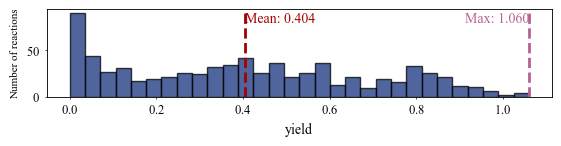

<Figure size 640x480 with 0 Axes>

In [4]:
import pub_ready_plots

with pub_ready_plots.get_context(
        width_frac=1,  # between 0 and 1
        height_frac=0.15,  # between 0 and 1
        layout="iclr",  # or "iclr", "neurips", "poster-portrait", "poster-landscape"
        single_col=False,  # only works for the "icml" layout
        nrows=1,  # depending on your subplots, default = 1
        ncols=1,  # depending on your subplots, default = 1
        override_rc_params={"lines.linewidth": 2.0},  # Overriding rcParams
        sharey=True,  # Additional keyword args for `plt.subplots`
    ) as (fig, axs):

    plot_histogram_with_statistics_subplots(cleaned_df['yield'], '', axs, threshold=None, log_scale=False)
    #fig.savefig('deoxyfluorination_distribution.pdf')
    plt.show()
    plt.clf()

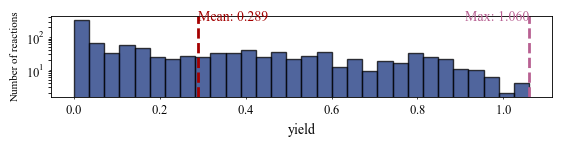

In [5]:
with pub_ready_plots.get_context(
        width_frac=1,  # between 0 and 1
        height_frac=0.15,  # between 0 and 1
        layout="iclr",  # or "iclr", "neurips", "poster-portrait", "poster-landscape"
        single_col=False,  # only works for the "icml" layout
        nrows=1,  # depending on your subplots, default = 1
        ncols=1,  # depending on your subplots, default = 1
        override_rc_params={"lines.linewidth": 2.0},  # Overriding rcParams
        sharey=True,  # Additional keyword args for `plt.subplots`
    ) as (fig, axs):

    plot_histogram_with_statistics_subplots(enhanced_df['yield'], '', axs, threshold=None, log_scale=True)
    #fig.savefig('deoxyfluorination_distribution_augmented.pdf')
    plt.show()
    plt.clf()

<Figure size 640x480 with 0 Axes>

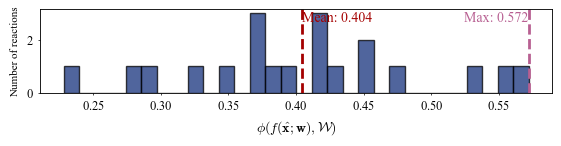

base                CC(N=P(N1CCCC1)(N2CCCC2)N3CCCC3)(C)C
fluoride         FC(C(F)(S(=O)(F)=O)F)(F)C(F)(F)C(F)(F)F
Average_yield                                   0.571892
Name: 1, dtype: object


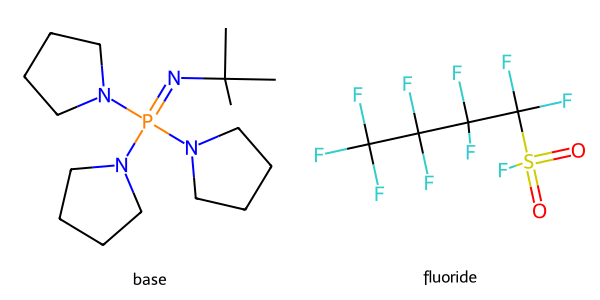

In [6]:
avg_yield = cleaned_df.groupby(['base', 'fluoride'])['yield'].mean().reset_index()
avg_yield.columns = ['base', 'fluoride', 'Average_yield']

with pub_ready_plots.get_context(
        width_frac=1,  # between 0 and 1
        height_frac=0.15,  # between 0 and 1
        layout="iclr",  # or "iclr", "neurips", "poster-portrait", "poster-landscape"
        single_col=False,  # only works for the "icml" layout
        nrows=1,  # depending on your subplots, default = 1
        ncols=1,  # depending on your subplots, default = 1
        override_rc_params={"lines.linewidth": 2.0},  # Overriding rcParams
        sharey=True,  # Additional keyword args for `plt.subplots`
    ) as (fig, axs):

    plot_histogram_with_statistics_subplots(avg_yield['Average_yield'], '', axs, threshold=None, log_scale=False, x_title=r"$\phi(f(\hat{\mathbf{x}}; \mathbf{w}), \mathcal{W})$")
    #fig.savefig('deoxyfluorination_distribution_avg.pdf')
    plt.show()
    plt.clf()

row = avg_yield.loc[avg_yield['Average_yield'].idxmax(), ['base', 'fluoride', 'Average_yield']]
print(row)

mols = [Chem.MolFromSmiles(row['base']), Chem.MolFromSmiles(row['fluoride'])]
img = Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(300, 300), legends=["base", "fluoride"])

display(img)

<Figure size 640x480 with 0 Axes>

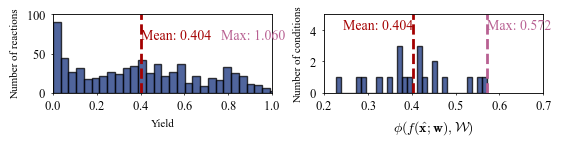

In [7]:
avg_yield = cleaned_df.groupby(['base', 'fluoride'])['yield'].mean().reset_index()
avg_yield.columns = ['base', 'fluoride', 'Average_yield']

with pub_ready_plots.get_context(
        width_frac=1,  # between 0 and 1
        height_frac=0.15,  # between 0 and 1
        layout="iclr",  # or "iclr", "neurips", "poster-portrait", "poster-landscape"
        single_col=False,  # only works for the "icml" layout
        nrows=1,  # depending on your subplots, default = 1
        ncols=2,  # depending on your subplots, default = 1
        override_rc_params={"lines.linewidth": 2.0},  # Overriding rcParams
        sharey=False,  # Additional keyword args for `plt.subplots`
    ) as (fig, axs):

    cmap = load_cmap('Austria')
    data = cleaned_df['yield']
    axs[0].hist(data, bins=30, alpha=0.75, edgecolor='black', log=False, color=cmap(1))
    mean = data.mean()
    max_val = data.max()
    std = data.std()
    axs[0].axvline(mean, color=cmap(0), linestyle='dashed', label='Mean')
    axs[0].axvline(max_val, color=cmap(4), linestyle='dashed', label='Max')
    axs[0].tick_params(axis='x', labelsize=9)
    axs[0].tick_params(axis='y', labelsize=9)
    axs[0].set_xlabel('Yield', fontsize = 8)
    axs[0].set_ylabel('Number of reactions', fontsize=8)
    axs[0].set_ylim([0, 100])
    axs[0].set_xlim([0, 1])
    ylim = axs[0].get_ylim()
    y_positions = np.linspace(ylim[0] * 1.1, ylim[1] * 0.9, 6)
    axs[0].text(mean, (y_positions[3] + y_positions[4] * 3)/4, f'Mean: {mean:.3f}', color=cmap(0), fontsize=10, ha='left')
    axs[0].text(max_val, (y_positions[3] + y_positions[4] * 3)/4, f'Max: {max_val:.3f}', color=cmap(4), fontsize=10, ha='right')
    

    data = avg_yield['Average_yield']
    axs[1].hist(data, bins=30, alpha=0.75, edgecolor='black', log=False, color=cmap(1))
    mean = data.mean()
    max_val = data.max()
    std = data.std()
    axs[1].axvline(mean, color=cmap(0), linestyle='dashed', label='Mean')
    axs[1].axvline(max_val, color=cmap(4), linestyle='dashed', label='Max')
    axs[1].tick_params(axis='x', labelsize=9)
    axs[1].tick_params(axis='y', labelsize=9)
    axs[1].set_xlabel(r"$\phi(f(\hat{\mathbf{x}}; \mathbf{w}), \mathcal{W})$", fontsize = 10)
    axs[1].set_ylabel('Number of conditions', fontsize=8)
    axs[1].set_ylim([0, 5])
    axs[1].set_xlim([0.2, 0.7])
    ylim = axs[1].get_ylim()
    y_positions = np.linspace(ylim[0] * 1.1, ylim[1] * 0.9, 6)
    axs[1].text(mean, (y_positions[3] + y_positions[5] * 3)/4, f'Mean: {mean:.3f}', color=cmap(0), fontsize=10, ha='right')
    axs[1].text(max_val, (y_positions[3] + y_positions[5] * 3)/4, f'Max: {max_val:.3f}', color=cmap(4), fontsize=10, ha='left')

    fig.savefig('deoxyfluorination_original.pdf')

    plt.show()
    plt.clf()

<Figure size 640x480 with 0 Axes>

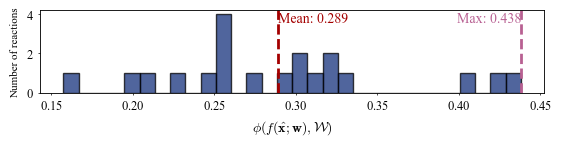

base                CC(N=P(N1CCCC1)(N2CCCC2)N3CCCC3)(C)C
fluoride         FC(C(F)(S(=O)(F)=O)F)(F)C(F)(F)C(F)(F)F
Average_yield                                   0.438114
Name: 1, dtype: object


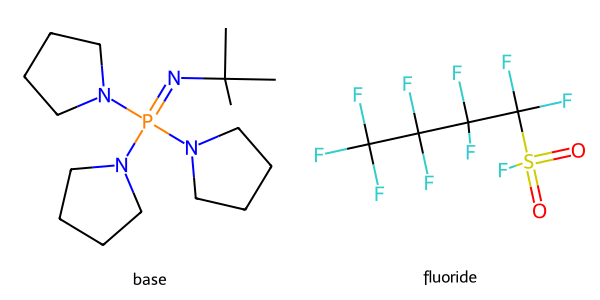

In [8]:
avg_yield = enhanced_df.groupby(['base', 'fluoride'])['yield'].mean().reset_index()
avg_yield.columns = ['base', 'fluoride', 'Average_yield']

with pub_ready_plots.get_context(
        width_frac=1,  # between 0 and 1
        height_frac=0.15,  # between 0 and 1
        layout="iclr",  # or "iclr", "neurips", "poster-portrait", "poster-landscape"
        single_col=False,  # only works for the "icml" layout
        nrows=1,  # depending on your subplots, default = 1
        ncols=1,  # depending on your subplots, default = 1
        override_rc_params={"lines.linewidth": 2.0},  # Overriding rcParams
        sharey=True,  # Additional keyword args for `plt.subplots`
    ) as (fig, axs):

    plot_histogram_with_statistics_subplots(avg_yield['Average_yield'], '', axs, threshold=None, log_scale=False, x_title=r"$\phi(f(\hat{\mathbf{x}}; \mathbf{w}), \mathcal{W})$")
    #fig.savefig('deoxyfluorination_distribution_avg_augmented.pdf')
    plt.show()
    plt.clf()

row = avg_yield.loc[avg_yield['Average_yield'].idxmax(), ['base', 'fluoride', 'Average_yield']]
print(row)

mols = [Chem.MolFromSmiles(row['base']), Chem.MolFromSmiles(row['fluoride'])]
img = Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(300, 300), legends=["base", "fluoride"])

display(img)

<Figure size 640x480 with 0 Axes>

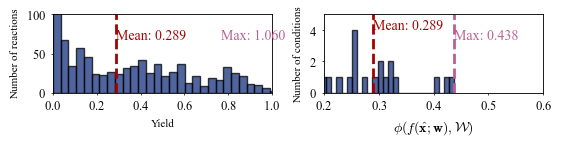

In [9]:
avg_yield = enhanced_df.groupby(['base', 'fluoride'])['yield'].mean().reset_index()
avg_yield.columns = ['base', 'fluoride', 'Average_yield']

with pub_ready_plots.get_context(
        width_frac=1,  # between 0 and 1
        height_frac=0.15,  # between 0 and 1
        layout="iclr",  # or "iclr", "neurips", "poster-portrait", "poster-landscape"
        single_col=False,  # only works for the "icml" layout
        nrows=1,  # depending on your subplots, default = 1
        ncols=2,  # depending on your subplots, default = 1
        override_rc_params={"lines.linewidth": 2.0},  # Overriding rcParams
        sharey=False,  # Additional keyword args for `plt.subplots`
    ) as (fig, axs):

    cmap = load_cmap('Austria')
    data = enhanced_df['yield']
    axs[0].hist(data, bins=30, alpha=0.75, edgecolor='black', log=False, color=cmap(1))
    mean = data.mean()
    max_val = data.max()
    std = data.std()
    axs[0].axvline(mean, color=cmap(0), linestyle='dashed', label='Mean')
    axs[0].axvline(max_val, color=cmap(4), linestyle='dashed', label='Max')
    axs[0].tick_params(axis='x', labelsize=9)
    axs[0].tick_params(axis='y', labelsize=9)
    axs[0].set_xlabel('Yield', fontsize = 8)
    axs[0].set_ylabel('Number of reactions', fontsize=8)
    axs[0].set_ylim([0, 100])
    axs[0].set_xlim([0, 1])
    ylim = axs[0].get_ylim()
    y_positions = np.linspace(ylim[0] * 1.1, ylim[1] * 0.9, 6)
    axs[0].text(mean, (y_positions[3] + y_positions[4] * 3)/4, f'Mean: {mean:.3f}', color=cmap(0), fontsize=10, ha='left')
    axs[0].text(max_val, (y_positions[3] + y_positions[4] * 3)/4, f'Max: {max_val:.3f}', color=cmap(4), fontsize=10, ha='right')
    

    data = avg_yield['Average_yield']
    axs[1].hist(data, bins=30, alpha=0.75, edgecolor='black', log=False, color=cmap(1))
    mean = data.mean()
    max_val = data.max()
    std = data.std()
    axs[1].axvline(mean, color=cmap(0), linestyle='dashed', label='Mean')
    axs[1].axvline(max_val, color=cmap(4), linestyle='dashed', label='Max')
    axs[1].tick_params(axis='x', labelsize=9)
    axs[1].tick_params(axis='y', labelsize=9)
    axs[1].set_xlabel(r"$\phi(f(\hat{\mathbf{x}}; \mathbf{w}), \mathcal{W})$", fontsize = 10)
    axs[1].set_ylabel('Number of conditions', fontsize=8)
    axs[1].set_ylim([0, 5])
    axs[1].set_xlim([0.2, 0.6])
    ylim = axs[1].get_ylim()
    y_positions = np.linspace(ylim[0] * 1.1, ylim[1] * 0.9, 6)
    axs[1].text(mean, (y_positions[3] + y_positions[5] * 3)/4, f'Mean: {mean:.3f}', color=cmap(0), fontsize=10, ha='left')
    axs[1].text(max_val, (y_positions[3] + y_positions[4] * 3)/4, f'Max: {max_val:.3f}', color=cmap(4), fontsize=10, ha='left')

    fig.savefig('deoxyfluorination_augmented.pdf')

    plt.show()
    plt.clf()

<Figure size 640x480 with 0 Axes>

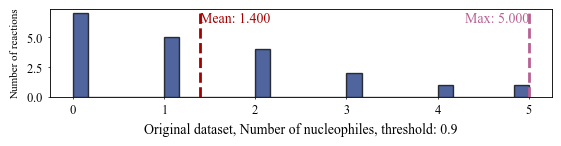

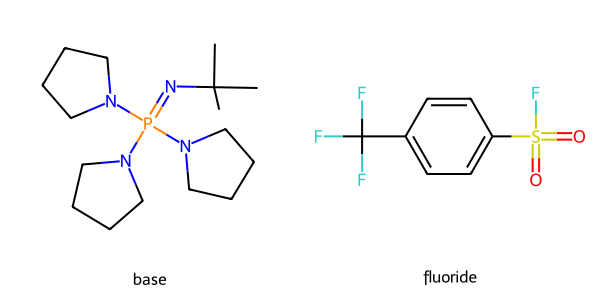

In [ ]:
threshold = 0.9
filtered_df = cleaned_df

group = filtered_df.groupby(['base', 'fluoride']).apply(lambda x: (x['yield'] > threshold).sum()).reset_index(name='Count')

with pub_ready_plots.get_context(
        width_frac=1,  # between 0 and 1
        height_frac=0.15,  # between 0 and 1
        layout="iclr",  # or "iclr", "neurips", "poster-portrait", "poster-landscape"
        single_col=False,  # only works for the "icml" layout
        nrows=1,  # depending on your subplots, default = 1
        ncols=1,  # depending on your subplots, default = 1
        override_rc_params={"lines.linewidth": 2.0},  # Overriding rcParams
        sharey=True,  # Additional keyword args for `plt.subplots`
    ) as (fig, axs):

    plot_histogram_with_statistics_subplots(group['Count'], '', axs, threshold=None, log_scale=False, x_title=f"Original dataset, Number of nucleophiles, threshold: {threshold}") #x_title=r"$\phi(f(\hat{\mathbf{x}}; \mathbf{w}), \mathcal{W})$")
    #fig.savefig('deoxyfluorination_distribution_frac.pdf')
    plt.show()
    plt.clf()

max_count = group['Count'].max()
max_rows = group[group['Count'] == max_count]
for index, row in max_rows.iterrows():
    mols = [Chem.MolFromSmiles(row['base']), Chem.MolFromSmiles(row['fluoride'])]
    img = Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(300, 300), legends=["base", "fluoride"])
    display(img)

<Figure size 640x480 with 0 Axes>

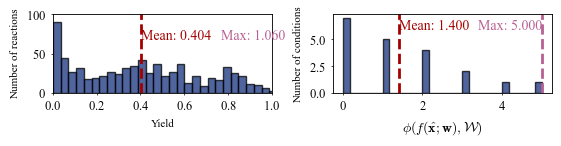

In [11]:
threshold = 0.9
filtered_df = cleaned_df

group = filtered_df.groupby(['base', 'fluoride']).apply(lambda x: (x['yield'] > threshold).sum()).reset_index(name='Count')

with pub_ready_plots.get_context(
        width_frac=1,  # between 0 and 1
        height_frac=0.15,  # between 0 and 1
        layout="iclr",  # or "iclr", "neurips", "poster-portrait", "poster-landscape"
        single_col=False,  # only works for the "icml" layout
        nrows=1,  # depending on your subplots, default = 1
        ncols=2,  # depending on your subplots, default = 1
        override_rc_params={"lines.linewidth": 2.0},  # Overriding rcParams
        sharey=False,  # Additional keyword args for `plt.subplots`
    ) as (fig, axs):

    cmap = load_cmap('Austria')
    data = cleaned_df['yield']
    axs[0].hist(data, bins=30, alpha=0.75, edgecolor='black', log=False, color=cmap(1))
    mean = data.mean()
    max_val = data.max()
    std = data.std()
    axs[0].axvline(mean, color=cmap(0), linestyle='dashed', label='Mean')
    axs[0].axvline(max_val, color=cmap(4), linestyle='dashed', label='Max')
    axs[0].tick_params(axis='x', labelsize=9)
    axs[0].tick_params(axis='y', labelsize=9)
    axs[0].set_xlabel('Yield', fontsize = 8)
    axs[0].set_ylabel('Number of reactions', fontsize=8)
    axs[0].set_ylim([0, 100])
    axs[0].set_xlim([0, 1])
    ylim = axs[0].get_ylim()
    y_positions = np.linspace(ylim[0] * 1.1, ylim[1] * 0.9, 6)
    axs[0].text(mean, (y_positions[3] + y_positions[4] * 3)/4, f'Mean: {mean:.3f}', color=cmap(0), fontsize=10, ha='left')
    axs[0].text(max_val, (y_positions[3] + y_positions[4] * 3)/4, f'Max: {max_val:.3f}', color=cmap(4), fontsize=10, ha='right')
    

    data = group['Count']
    axs[1].hist(data, bins=30, alpha=0.75, edgecolor='black', log=False, color=cmap(1))
    mean = data.mean()
    max_val = data.max()
    std = data.std()
    axs[1].axvline(mean, color=cmap(0), linestyle='dashed', label='Mean')
    axs[1].axvline(max_val, color=cmap(4), linestyle='dashed', label='Max')
    axs[1].tick_params(axis='x', labelsize=9)
    axs[1].tick_params(axis='y', labelsize=9)
    axs[1].set_xlabel(r"$\phi(f(\hat{\mathbf{x}}; \mathbf{w}), \mathcal{W})$", fontsize = 10)
    axs[1].set_ylabel('Number of conditions', fontsize=8)
    ylim = axs[1].get_ylim()
    y_positions = np.linspace(ylim[0] * 1.1, ylim[1] * 0.9, 6)
    axs[1].text(mean, (y_positions[3] + y_positions[5] * 3)/4, f'Mean: {mean:.3f}', color=cmap(0), fontsize=10, ha='left')
    axs[1].text(max_val, (y_positions[3] + y_positions[5] * 3)/4, f'Max: {max_val:.3f}', color=cmap(4), fontsize=10, ha='right')

    fig.savefig('deoxyfluorination_original_frac.pdf')

    plt.show()
    plt.clf()

<Figure size 640x480 with 0 Axes>

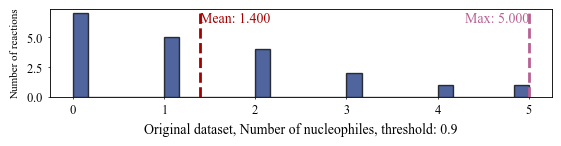

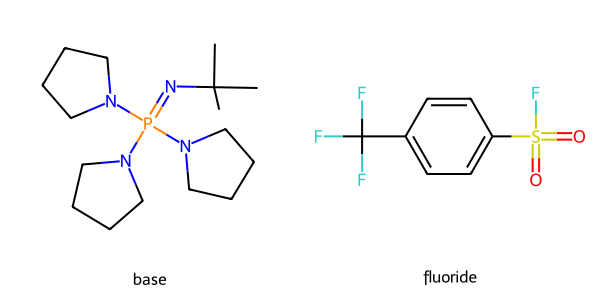

In [12]:
threshold = 0.9
filtered_df = enhanced_df

group = filtered_df.groupby(['base', 'fluoride']).apply(lambda x: (x['yield'] > threshold).sum()).reset_index(name='Count')

with pub_ready_plots.get_context(
        width_frac=1,  # between 0 and 1
        height_frac=0.15,  # between 0 and 1
        layout="iclr",  # or "iclr", "neurips", "poster-portrait", "poster-landscape"
        single_col=False,  # only works for the "icml" layout
        nrows=1,  # depending on your subplots, default = 1
        ncols=1,  # depending on your subplots, default = 1
        override_rc_params={"lines.linewidth": 2.0},  # Overriding rcParams
        sharey=True,  # Additional keyword args for `plt.subplots`
    ) as (fig, axs):

    plot_histogram_with_statistics_subplots(group['Count'], '', axs, threshold=None, log_scale=False, x_title=f"Original dataset, Number of nucleophiles, threshold: {threshold}") #x_title=r"$\phi(f(\hat{\mathbf{x}}; \mathbf{w}), \mathcal{W})$")
    #fig.savefig('deoxyfluorination_distribution_frac_augmented.pdf')
    plt.show()
    plt.clf()

max_count = group['Count'].max()
max_rows = group[group['Count'] == max_count]
for index, row in max_rows.iterrows():
    mols = [Chem.MolFromSmiles(row['base']), Chem.MolFromSmiles(row['fluoride'])]
    img = Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(300, 300), legends=["base", "fluoride"])
    display(img)

<Figure size 640x480 with 0 Axes>

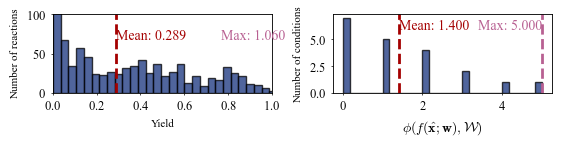

In [13]:
threshold = 0.9
filtered_df = enhanced_df

group = filtered_df.groupby(['base', 'fluoride']).apply(lambda x: (x['yield'] > threshold).sum()).reset_index(name='Count')

with pub_ready_plots.get_context(
        width_frac=1,  # between 0 and 1
        height_frac=0.15,  # between 0 and 1
        layout="iclr",  # or "iclr", "neurips", "poster-portrait", "poster-landscape"
        single_col=False,  # only works for the "icml" layout
        nrows=1,  # depending on your subplots, default = 1
        ncols=2,  # depending on your subplots, default = 1
        override_rc_params={"lines.linewidth": 2.0},  # Overriding rcParams
        sharey=False,  # Additional keyword args for `plt.subplots`
    ) as (fig, axs):

    cmap = load_cmap('Austria')
    data = enhanced_df['yield']
    axs[0].hist(data, bins=30, alpha=0.75, edgecolor='black', log=False, color=cmap(1))
    mean = data.mean()
    max_val = data.max()
    std = data.std()
    axs[0].axvline(mean, color=cmap(0), linestyle='dashed', label='Mean')
    axs[0].axvline(max_val, color=cmap(4), linestyle='dashed', label='Max')
    axs[0].tick_params(axis='x', labelsize=9)
    axs[0].tick_params(axis='y', labelsize=9)
    axs[0].set_xlabel('Yield', fontsize = 8)
    axs[0].set_ylabel('Number of reactions', fontsize=8)
    axs[0].set_ylim([0, 100])
    axs[0].set_xlim([0, 1])
    ylim = axs[0].get_ylim()
    y_positions = np.linspace(ylim[0] * 1.1, ylim[1] * 0.9, 6)
    axs[0].text(mean, (y_positions[3] + y_positions[4] * 3)/4, f'Mean: {mean:.3f}', color=cmap(0), fontsize=10, ha='left')
    axs[0].text(max_val, (y_positions[3] + y_positions[4] * 3)/4, f'Max: {max_val:.3f}', color=cmap(4), fontsize=10, ha='right')
    

    data = group['Count']
    axs[1].hist(data, bins=30, alpha=0.75, edgecolor='black', log=False, color=cmap(1))
    mean = data.mean()
    max_val = data.max()
    std = data.std()
    axs[1].axvline(mean, color=cmap(0), linestyle='dashed', label='Mean')
    axs[1].axvline(max_val, color=cmap(4), linestyle='dashed', label='Max')
    axs[1].tick_params(axis='x', labelsize=9)
    axs[1].tick_params(axis='y', labelsize=9)
    axs[1].set_xlabel(r"$\phi(f(\hat{\mathbf{x}}; \mathbf{w}), \mathcal{W})$", fontsize = 10)
    axs[1].set_ylabel('Number of conditions', fontsize=8)
    ylim = axs[1].get_ylim()
    y_positions = np.linspace(ylim[0] * 1.1, ylim[1] * 0.9, 6)
    axs[1].text(mean, (y_positions[3] + y_positions[5] * 3)/4, f'Mean: {mean:.3f}', color=cmap(0), fontsize=10, ha='left')
    axs[1].text(max_val, (y_positions[3] + y_positions[5] * 3)/4, f'Max: {max_val:.3f}', color=cmap(4), fontsize=10, ha='right')

    fig.savefig('deoxyfluorination_augmented_frac.pdf')

    plt.show()
    plt.clf()